## Demonstration of Clustering Analysis
Let's proceed with the clustering case study using the "penguins" dataset. We'll demonstrate four types of clustering methods: 1) partitioning methods, 2) hierarchical methods, and 3) density-based methods. we will visualize the clustering results and compare them using the Silhouette Score.

## Setup
Load and Explore the "Penguins" Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the "penguins" dataset from Seaborn
penguins = sns.load_dataset('penguins')

# Explore the basic information about the dataset
print(penguins.head())
print(penguins.info())
print(penguins.describe())

# Drop rows with missing values
penguins = penguins.dropna()

# Convert categorical variables to numerical representations using one-hot encoding
penguins = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)

# Extract the feature columns for clustering
X = penguins.drop('species_Chinstrap', axis=1)


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_

## Clustering with Partitioning Methods (e.g., K-means)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


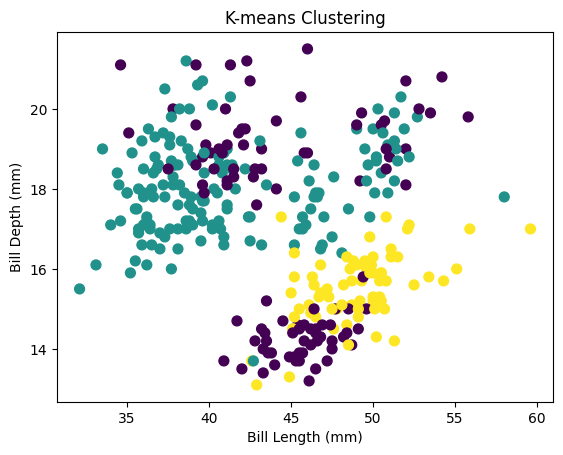

Silhouette Score (K-means): 0.5752


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Visualize K-means clustering results
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-means Clustering')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Calculate the Silhouette Score for K-means clustering
silhouette_score_kmeans = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score (K-means): {silhouette_score_kmeans:.4f}")


## Clustering with Hierarchical Methods (e.g., Agglomerative Clustering)

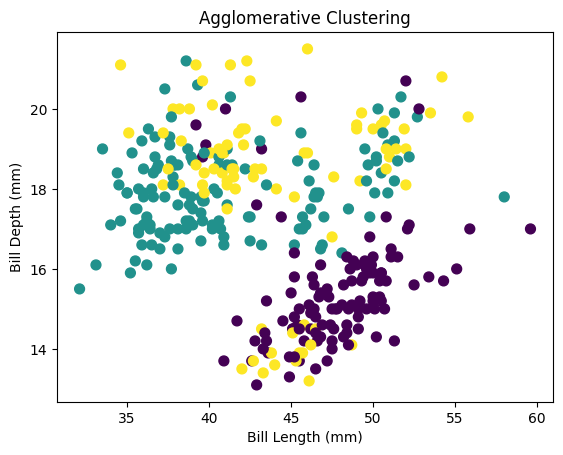

Silhouette Score (Agglomerative Clustering): 0.5164


In [3]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(X)

# Visualize Agglomerative Clustering results
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=agglomerative_labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Calculate the Silhouette Score for Agglomerative Clustering
silhouette_score_agglomerative = silhouette_score(X, agglomerative_labels)
print(f"Silhouette Score (Agglomerative Clustering): {silhouette_score_agglomerative:.4f}")


## Clustering with Density-Based Methods (e.g., DBSCAN)

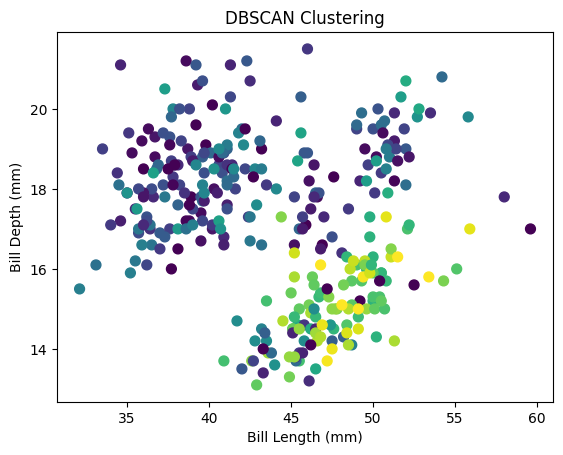

Silhouette Score (DBSCAN): 0.6150


In [4]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=20, min_samples=2)
dbscan_labels = dbscan.fit_predict(X)

# Visualize DBSCAN clustering results
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Calculate the Silhouette Score for DBSCAN clustering
silhouette_score_dbscan = silhouette_score(X, dbscan_labels)
print(f"Silhouette Score (DBSCAN): {silhouette_score_dbscan:.4f}")

## Compare the Results and Conclusion

In [5]:
# Compare the Silhouette Scores
silhouette_scores = [silhouette_score_kmeans, silhouette_score_agglomerative, silhouette_score_dbscan]
method_names = ['K-means', 'Agglomerative', 'DBSCAN']

for i, score in enumerate(silhouette_scores):
    print(f"Silhouette Score ({method_names[i]}): {score:.4f}")

# Summarize and compare the clustering results
# You can summarize and compare the clustering results based on the visualization and silhouette scores obtained from each method.
# Discuss the strengths and limitations of each clustering method in the context of the "penguins" dataset.

# Conclusion
# Summarize the findings and insights gained from the case study, and discuss potential applications or future work.


Silhouette Score (K-means): 0.5752
Silhouette Score (Agglomerative): 0.5164
Silhouette Score (DBSCAN): 0.6150
